In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import feature_finder_keiko as ff
from datetime import datetime
from sklearn.metrics import mean_squared_error

Could not import rpy package
Could not import r-package RCIT


In [4]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

f = 12
taus = np.arange(1,4,1)
cc = 'ET'
extremes_treshold = -1

In [9]:
original_count, count = ff.drought_timeseries("./{}_gamma_18912015_{}.npy".format(cc,f),train_start[ijz],validation_end[ijz],extremes_treshold = extremes_treshold)

In [13]:
data = original_count

In [20]:
fit3 = SimpleExpSmoothing(data).fit()

In [21]:
fcast3 = fit3.forecast(60)

In [22]:
fcast3

array([24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202,
       24.17986202, 24.17986202, 24.17986202, 24.17986202, 24.17986202])

In [36]:
fit3 = Holt(data).fit()

In [37]:
fit3.summary()

Dep. Variable:,endog,No. Observations:,420
Model:,Holt,SSE,44816.651
Optimized:,True,AIC,1969.434
Trend:,Additive,BIC,1985.595
Seasonal:,None,AICC,1969.637
Seasonal Periods:,None,Date:,"Thu, 30 Sep 2021"
Box-Cox:,False,Time:,10:05:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9229411,alpha,True
smoothing_slope,0.000000,beta,True


In [31]:
pred = fit3.forecast(60)

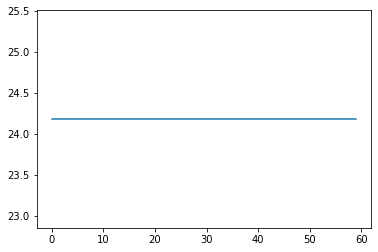

In [32]:
plt.plot(pred)

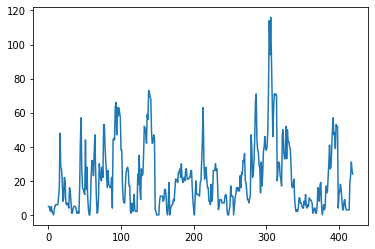

In [29]:
plt.plot(data)

In [83]:
np.load("./drought/data_1948_1987.npy")

array([  5,   5,   3,   2,   5,   2,   1,   0,   3,   5,   6,   6,   6,
         6,  11,  16,  48,  28,  27,  20,   8,  10,  22,  20,   7,   6,
         7,   6,   4,  16,  14,   8,   1,   1,   4,   5,   5,   5,   4,
         1,   1,   2,   1,  16,  43,  57,  26,  16,  15,  13,  12,  44,
        15,  28,  11,   4,   0,   0,   9,  25,  32,  31,  23,  36,  47,
        26,  11,   1,   2,  10,  30,  26,  21,  20,  28,  22,  53,  53,
        39,  31,  22,  16,  26,  18,  17,  16,  16,  22,   4,  44,  45,
        44,  63,  66,  47,  63,  58,  63,  60,  57,  38,  38,  17,   9,
         7,   7,  18,  25,  27,  28,  26,  17,  17,   2,   1,   7,   2,
         4,  12,   3,   2,   2,   2,  24,  18,  35,  15,   9,  27,  23,
        24,  35,  52,  51,  48,  42,  59,  56,  73,  72,  69,  68,  48,
        42,  43,  47,  45,   3,   2,   0,   0,   0,   0,   8,  11,  11,
        11,  11,   8,   9,  15,  15,  11,   2,   0,   6,  19,   0,   3,
         5,   6,   6,   9,   8,  14,  21,  20,  21,  19,  25,  2

In [14]:
class_list = np.load("ZW_class_list.npy")

In [15]:
len(class_list)

136

In [102]:
class_list = np.load("ET_class_list.npy")
class_name = "Aw"
index = (np.array(class_list) == class_name)

for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries_class("./{}_gamma_18912015_{}.npy".format(cc,f),index,train_start[ijz],test_end[ijz],extremes_treshold = extremes_treshold)
    np.save("./drought/{}/data_{}_{}.npy".format(class_name, train_start[ijz],test_end[ijz]),original_count)

In [76]:
temporal_limits = {"time_min":datetime(train_start[0], 1, 1, 0, 0),"time_max":datetime(test_end[-1], 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("./{}_gamma_18912015_{}.npy".format(cc,f),train_start[0],test_end[-1],extremes_treshold = extremes_treshold)
np.save("./drought/data_{}_{}.npy".format(train_start[0],test_end[-1]),original_count)

In [7]:
for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("./{}_gamma_18912015_{}.npy".format(cc,f),train_start[ijz],test_end[ijz],extremes_treshold = extremes_treshold)
    np.save("./drought/{}/data_{}_{}.npy".format(cc,train_start[ijz],test_end[ijz]),original_count)

In [9]:
taus = np.arange(1,13)

In [10]:
result = np.zeros((12,29))
for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("./{}_gamma_18912015_{}.npy".format(cc,f),train_start[ijz],test_end[ijz],extremes_treshold = extremes_treshold)

    test = original_count[420:]
    mse = []
    for tau in taus:
        pred = []
        end = 60 - tau
        for j in range(11,end):
            pred.append(np.mean(test[j-11:j+1]))
        mse.append(mean_squared_error(pred, test[11+tau:60]))
    result[:,ijz] = mse        

In [12]:
np.save("{}_naive_mean.npy".format(cc),result)

In [13]:
class_list = np.load("ET_class_list.npy")
class_name = "Cwb"
index = (np.array(class_list) == class_name)


step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)
taus = np.arange(1,13)

result = np.zeros((12,29))
for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries_class("./{}_gamma_18912015_{}.npy".format(cc,f),index,train_start[ijz],test_end[ijz],extremes_treshold = extremes_treshold)

    test = original_count[420:]
    mse = []
    for tau in taus:
        pred = []
        end = 60 - tau
        for j in range(11,end):
            pred.append(np.mean(test[j-11:j+1]))
        mse.append(mean_squared_error(pred, test[11+tau:60]))
    result[:,ijz] = mse        

In [14]:
np.save("./drought/{}/naive.npy".format(class_name),result)

In [7]:
mse

[276.44820601851853, 332.78871158392434, 383.4470108695652]

In [34]:
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("./{}_gamma_18912015_{}.npy".format(cc,f),train_start[ijz],test_end[ijz],extremes_treshold = extremes_treshold)

    test = original_count[420:]
    mse = []
    for tau in taus:
        pred = []
        end = 60 - tau
        for j in range(11,end):
            pred.append(np.mean(test[j-11:j+1]))
        mse.append(mean_squared_error(pred, test[11+tau:60]))

48
47
46
45
44
43
42
41
40
39
38
37


In [37]:
len(mse)

12

In [ ]:
mse<-c()
for(i in c(1:12)){
end <- length(test)-(i-1)-1
pred<-c()
for(j in c(12:end)){
  pred<-c(pred,forecast(ets(test[j], model=fit, use.initial = TRUE),h=h)$mean[i])
}

start_idx <- i+12
end_idx <- length(test)

mse<-c(mse,sum(test[start_idx:end_idx] - pred)^2)
}
result[,k]<- mse
}
npySave("Naive.npy", result)

In [13]:
tau = 1

In [14]:
for j in range(11,(60 - tau)):
    print(j)

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [17]:
58 - 10

48